<a href="https://colab.research.google.com/github/MeghanaRanganath98/ML-Capstone-project-Regression/blob/main/Meghana_RS_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns #graphical representation
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


In [2]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
df = pd.read_csv('/content/drive/MyDrive/ML/Copy of Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
df.shape  #number of rows and columns in the dataset

(8760, 14)

In [ ]:
df.columns  #all the columns in the dataset

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.head() #top five rows 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()  #last five rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
# Describe both numerical and categorical data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
#Lets check the Rented Bike Count for more than 75 percentile
df.describe(include='all', percentiles=[.25, .50, .75, .95,.99])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


NOTE: Since at 99% the Rented Bike Count is 2526 but the max value is 3556, we need to make sure if values in that range or that exact value is an outlier or not.

In [7]:
df[df['Rented Bike Count']>2500]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3282,16/04/2018,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
3498,25/04/2018,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes
3522,26/04/2018,2574,18,17.4,45,3.1,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,Yes
3546,27/04/2018,2577,18,20.3,47,2.5,705,8.6,0.77,0.0,0.0,Spring,No Holiday,Yes
3618,30/04/2018,2558,18,23.0,54,2.9,679,13.1,0.81,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,16/10/2018,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
7746,19/10/2018,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,22/10/2018,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7866,24/10/2018,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
df[df['Rented Bike Count']==0]


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [38]:
# Lets import DatetimeIndex to extract Date column
import datetime as dt

In [39]:
df['Date']=pd.to_datetime(df['Date'])
# Extracting year, day, month and weekdays from the date column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df["Month"]=df["Date"].dt.month_name()
df['weekday']=df["Date"].dt.day_name()

In [11]:
df['weekday'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [40]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,January,Thursday


In [41]:
(df['Solar Radiation (MJ/m2)'].value_counts()/ len(df['Solar Radiation (MJ/m2)']))*100

0.00    49.086758
0.01     1.461187
0.02     0.936073
0.03     0.787671
0.06     0.696347
          ...    
3.38     0.011416
2.97     0.011416
3.44     0.011416
3.49     0.011416
3.45     0.011416
Name: Solar Radiation (MJ/m2), Length: 345, dtype: float64

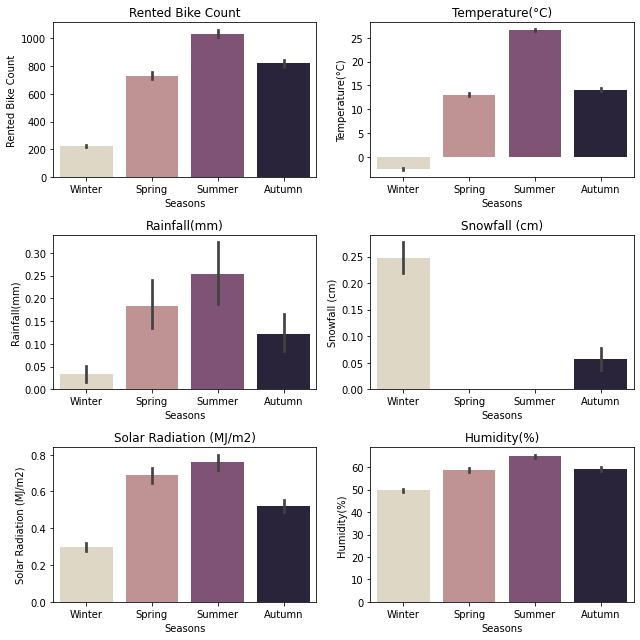

In [43]:
f, ax = plt.subplots(3,2, figsize=(9,9))
y = [['Rented Bike Count', 'Temperature(°C)'], ['Rainfall(mm)', 'Snowfall (cm)'], ['Solar Radiation (MJ/m2)','Humidity(%)']]


for i in range(3):
    for j in range(2):
       sns.barplot(data=df, x='Seasons', y=y[i][j], ax=ax[i][j], palette='ch:s=-.2,r=.6')
       ax[i][j].set_title(title[i][j])

plt.tight_layout()     

In [14]:
#df.drop('Solar Radiation (MJ/m2)', axis = 1, inplace = True)

In [45]:
df["label_day_night"]=df["Hour"].apply(lambda x: 'Night' if(x>20 or x< 5) else ('Day'))
df["label_day_night"].value_counts()

Day      5840
Night    2920
Name: label_day_night, dtype: int64

Since "Rented Bike Count" is dependent variable

In [16]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Day', 'Month', 'weekday',
       'label_day_night'],
      dtype='object')

In [17]:
# Duplicate
len(df[df.duplicated()])

0

We come to know that there are no 'Duplicate' values, all the data sets are unique.

In [18]:
# Numeric Features
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Year', 'Day'],
      dtype='object')

With 'Numeric Features' we can find the columns which consists of numerical values.

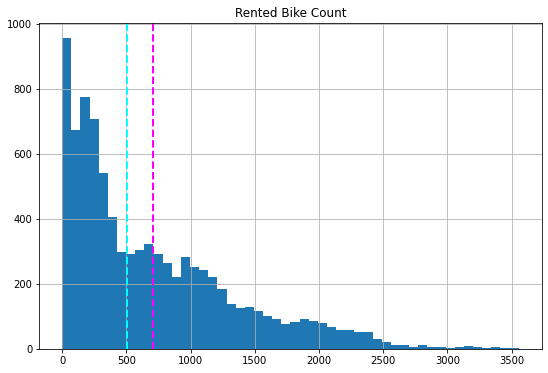

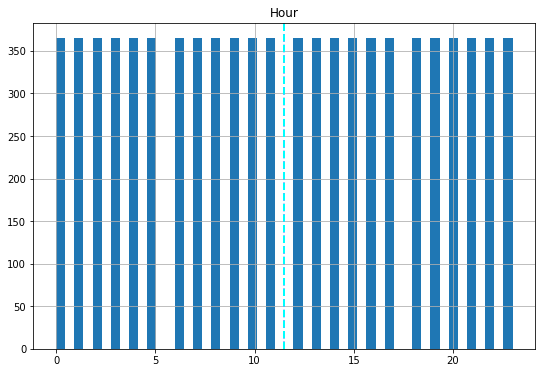

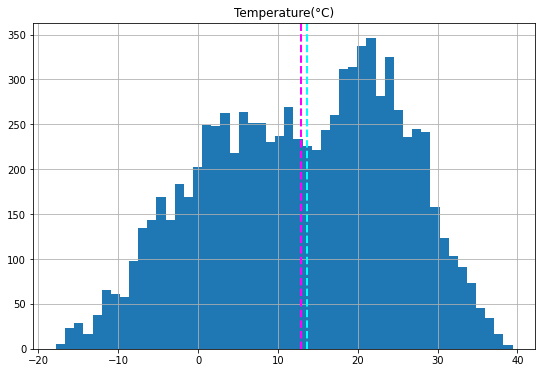

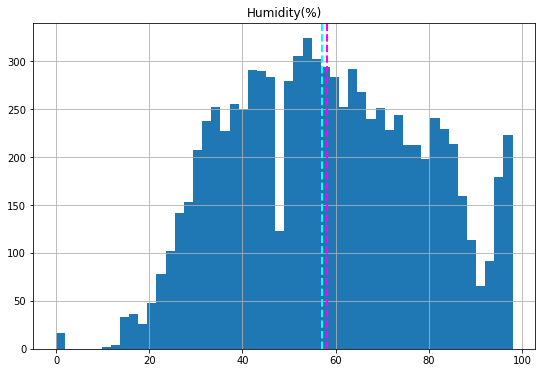

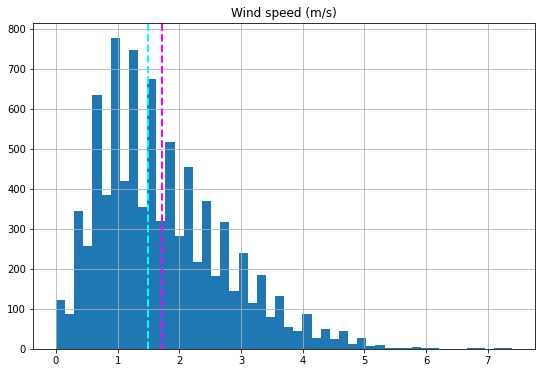

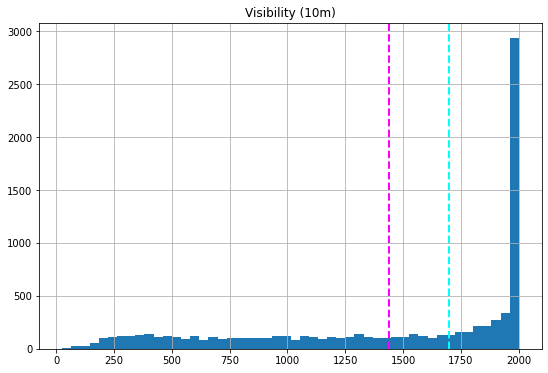

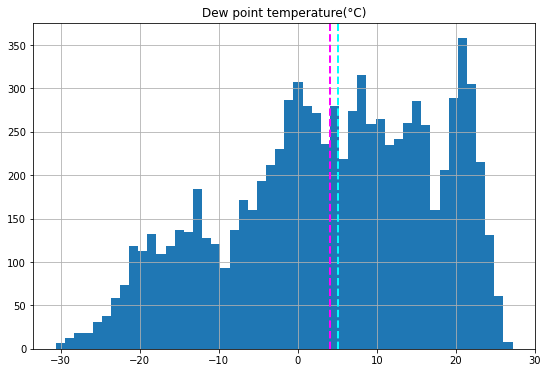

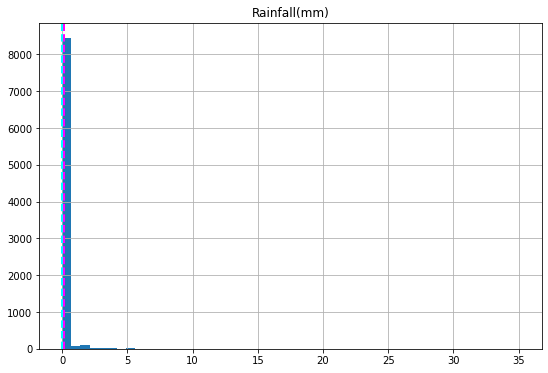

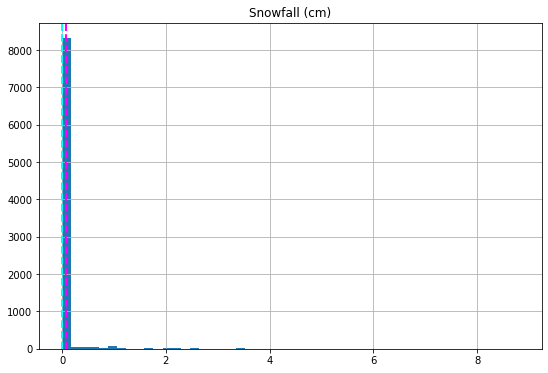

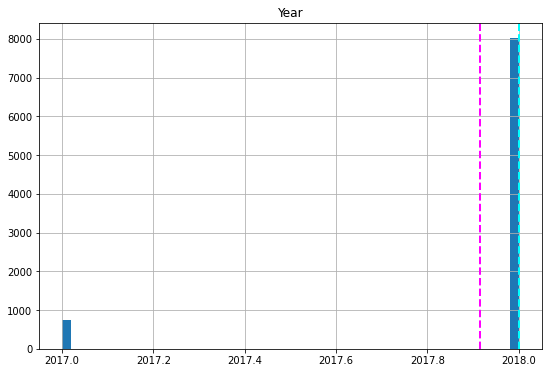

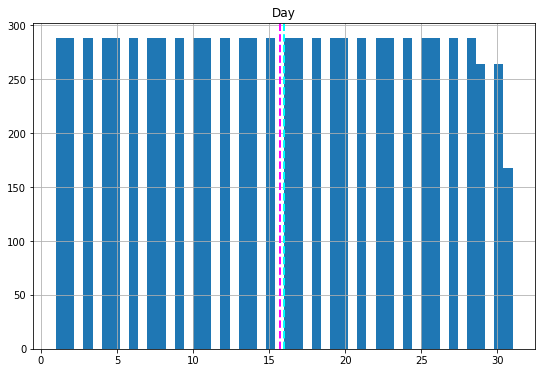

In [19]:
# Ploting of each numeric features
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(),color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(),color = 'cyan', linestyle = 'dashed', linewidth = 2)
  ax.set_title(col)
plt.show()

### Since, all the columns in numeric_features except for 'Rented Bike Count' are independent variables.

### Therefore, we do the plotting of the independent variable with 'Rented Bike Count'.

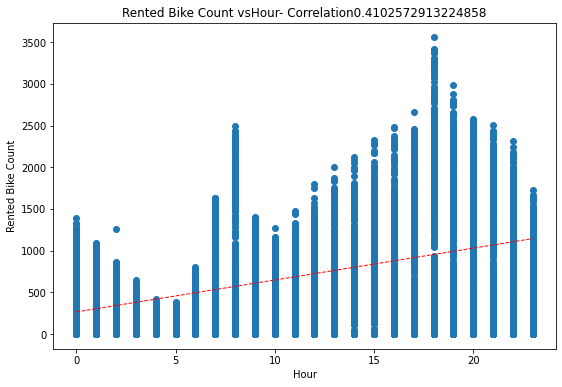

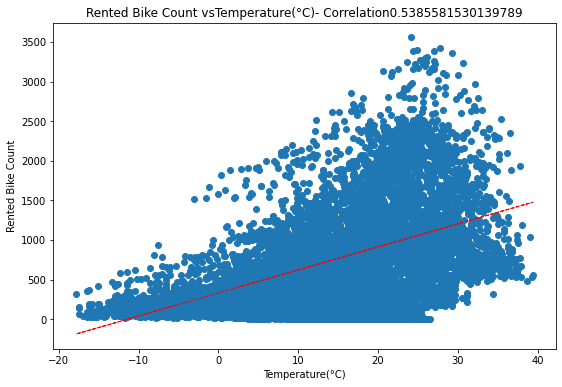

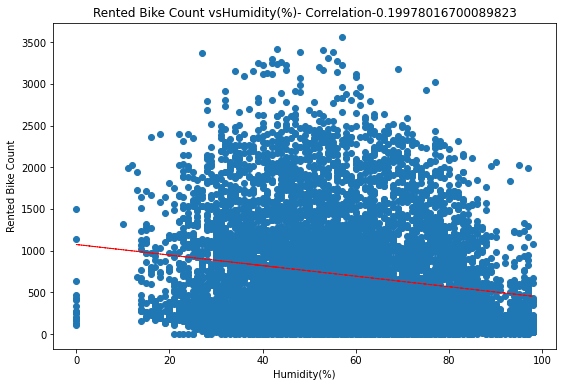

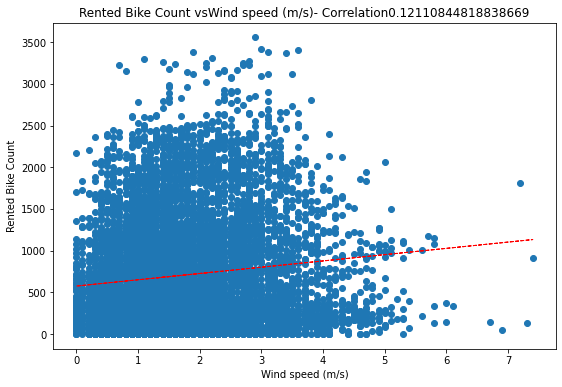

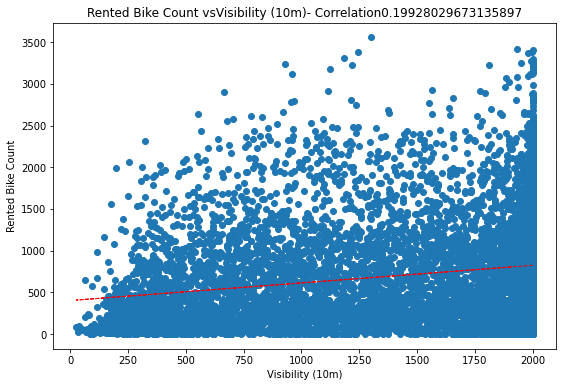

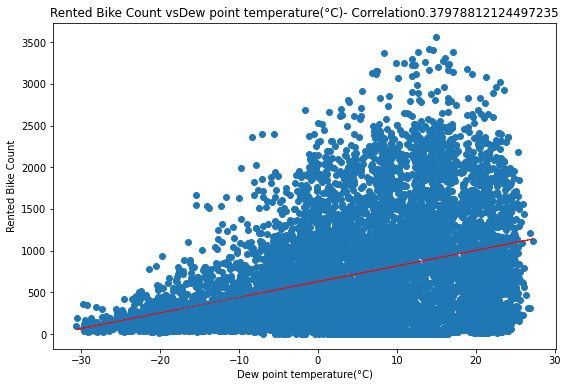

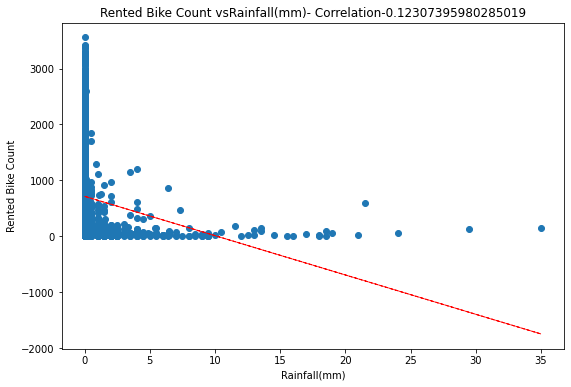

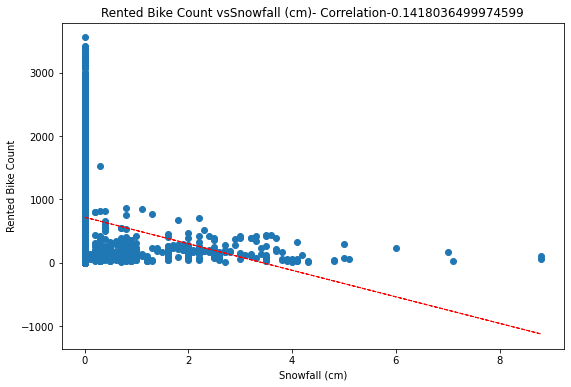

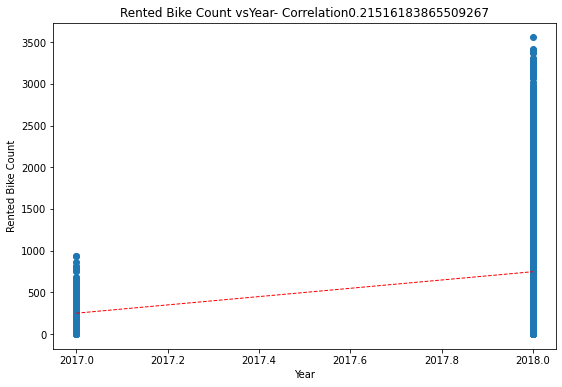

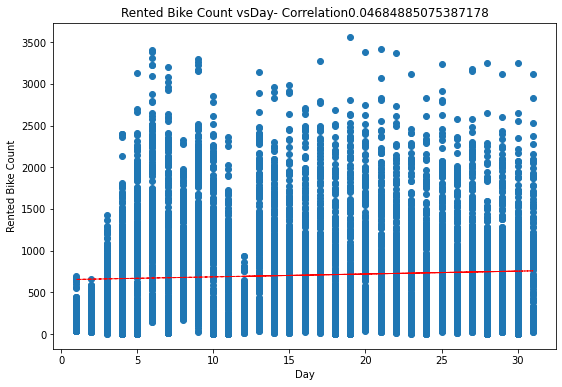

In [20]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs'+ col + '- Correlation' + str(correlation))
  z = np.polyfit(df[col],df['Rented Bike Count'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,'r--',lw=1)
plt.show()

# Exploratory Data Analysis
To check the distribution of variables

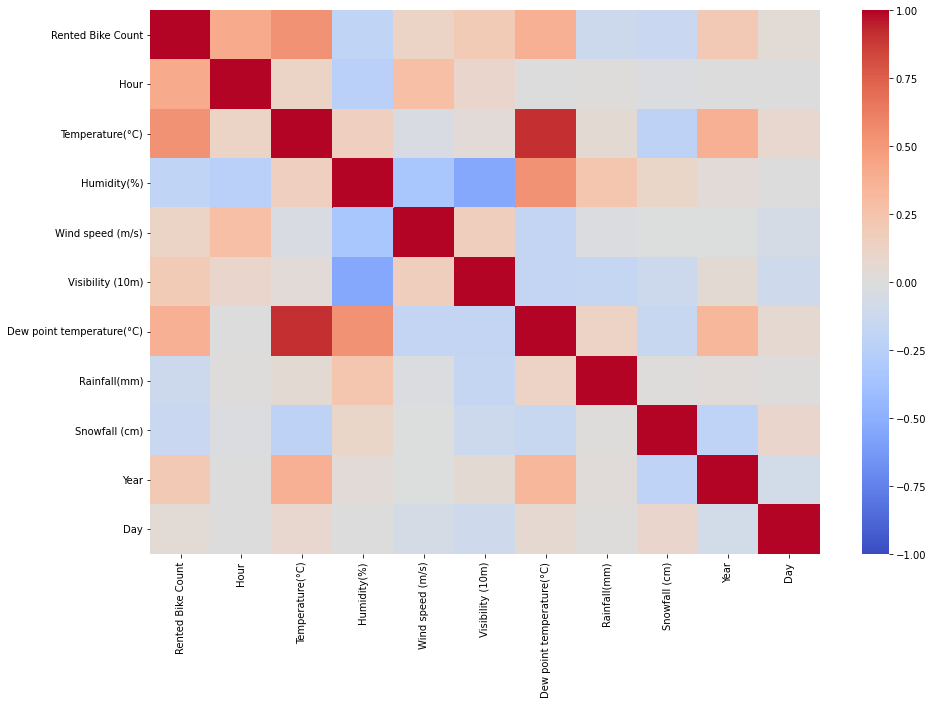

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm')

In [42]:
# dropping Dew point temperature column from the dataset
df.drop('Dew point temperature(°C)', axis = 1, inplace = True)

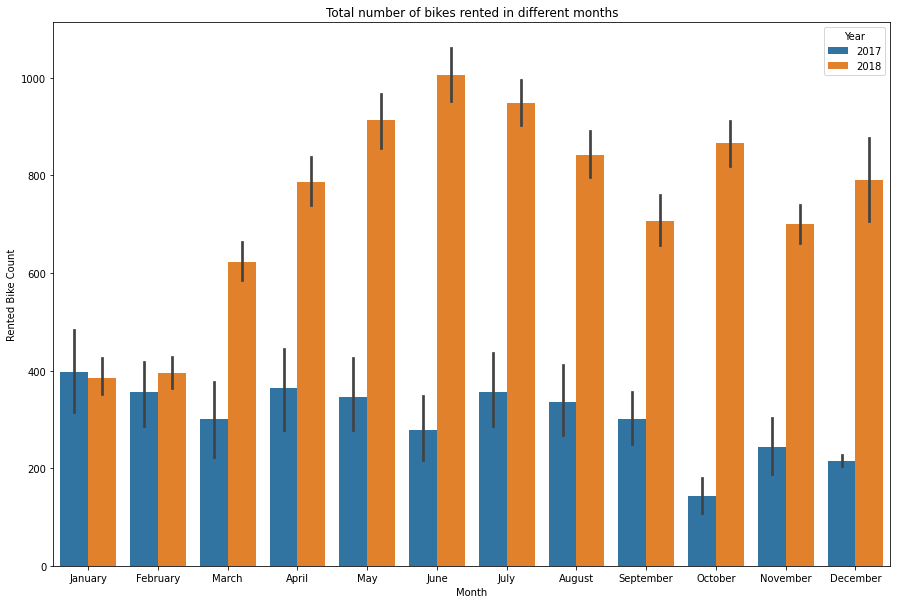

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Month', y = 'Rented Bike Count', data = df, hue = 'Year')
plt.title("Total number of bikes rented in different months")
plt.show()


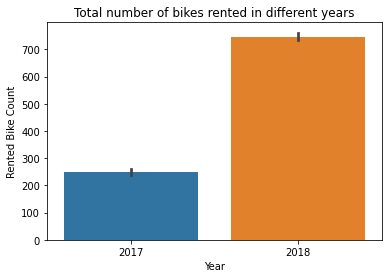

In [27]:
sns.barplot(x = 'Year', y = 'Rented Bike Count', data = df)
plt.title("Total number of bikes rented in different years")
plt.show()

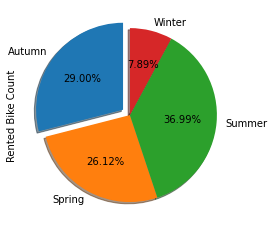

In [28]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(startangle=90, shadow=True,explode=(0.1, 0, 0, 0), autopct='%1.2f%%')

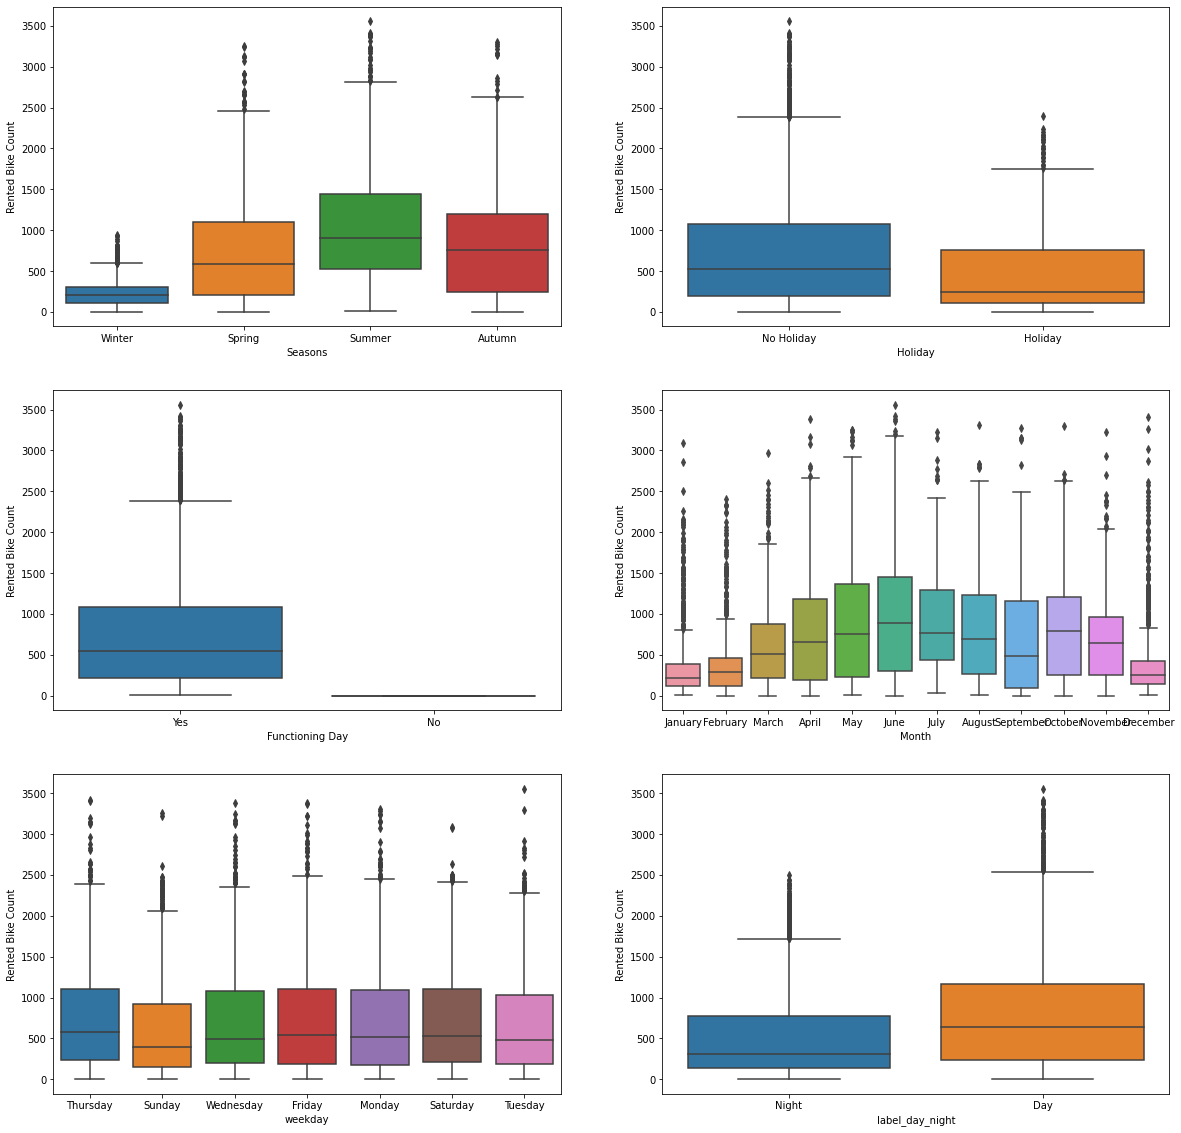

In [46]:
"""
Let's visualize the categorical variables
For better understanding lets subplot for 1.Seasons, 2.Holiday, 3.Functioning_Day, 4.Month, 5.Weekday, 6.Label_day_night
"""
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'Month', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'label_day_night', y = 'Rented Bike Count', data = df)

##  change holiday or no holiday to yes or no

In [ ]:
label = {'Holiday': {'Holiday': 'Yes', 'No Holiday': 'No'}}

df = df.replace(label)

df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes


#we can see that dates are unsorted

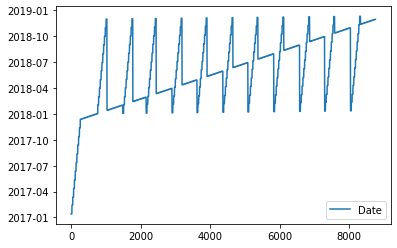

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.plot(y='Date')

## hh:00:00 format from hour columns

In [ ]:

hour = [str(hour)+':00:00' if hour>9 else '0'+str(hour)+':00:00' for hour in df['Hour']]

## Add hh:00:00 format to date

In [ ]:
df['Date'] = [str(date)[:10]+' '+hour for date, hour in zip(df['Date'].values, hour)]

In [ ]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
1,2017-01-12 01:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
2,2017-01-12 02:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes
3,2017-01-12 03:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes
4,2017-01-12 04:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30 19:00:00,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No,Yes
8756,2018-11-30 20:00:00,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8757,2018-11-30 21:00:00,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No,Yes
8758,2018-11-30 22:00:00,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No,Yes


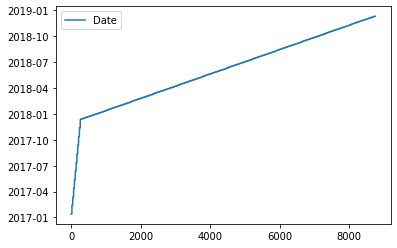

In [ ]:
# # Sort dates
df = df.sort_values(by=['Date']).reset_index(drop=True)
df.plot(y='Date')


In [ ]:
# Create days and months as new features
dates = df.Date
days = [date.weekday() for date in dates]
months = [date.month for date in dates]

df['day'] = days
df['month'] = months

df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No,Yes,3,1
1,2017-01-12,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No,Yes,3,1
2,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No,Yes,3,1
3,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No,Yes,3,1
4,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No,Yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-11,1084,15,13.8,34,2.4,1438,-1.8,1.45,0.0,0.0,Autumn,No,Yes,1,12
8756,2018-12-11,886,14,14.2,33,1.5,1374,-1.8,1.84,0.0,0.0,Autumn,No,Yes,1,12
8757,2018-12-11,785,11,10.3,40,0.7,1672,-2.7,1.66,0.0,0.0,Autumn,No,Yes,1,12
8758,2018-12-11,888,12,12.3,37,0.8,1690,-1.9,1.93,0.0,0.0,Autumn,No,Yes,1,12


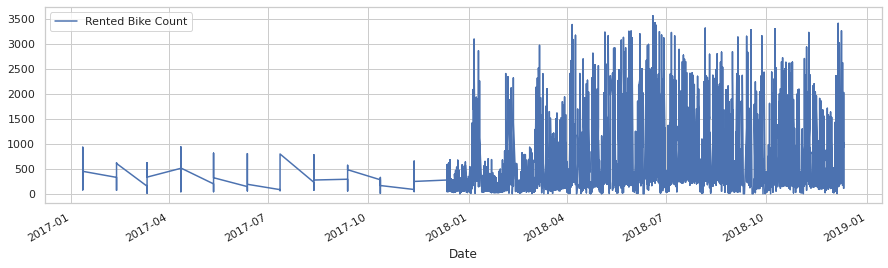

In [ ]:
df.plot(x='Date', y='Rented Bike Count', figsize=(15,4))

so by above visualization we can see that the number of bike rents in 2017 was less than in 2018. The bike rents peaked in July 2018 then reduced slightly until December 2018.

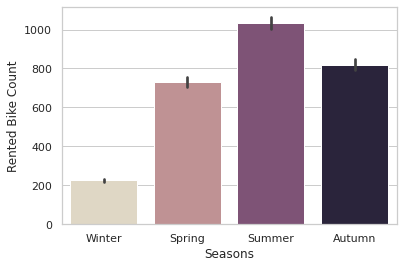

In [ ]:


import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Seasons", y="Rented Bike Count", data=df,palette='ch:s=-.2,r=.6')


## The seasonal movement of bike counts correlates very well with temperature, solar radiation, and humidity. The highest count of rented bikes occurs in summer, while the least occurs in winter.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


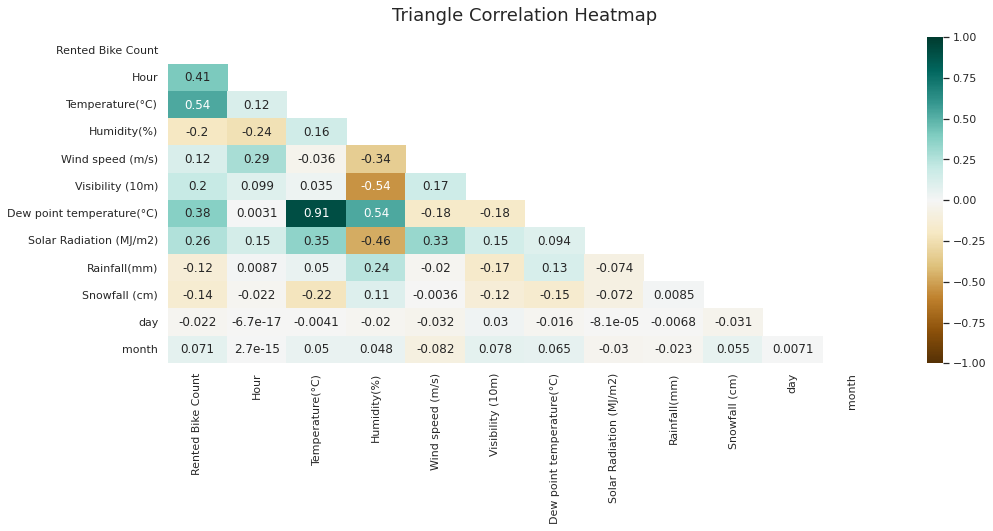

In [ ]:
df.corr()
# plt.figure(figsize=(8,8))
# sns.heatmap(df.corr());


plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

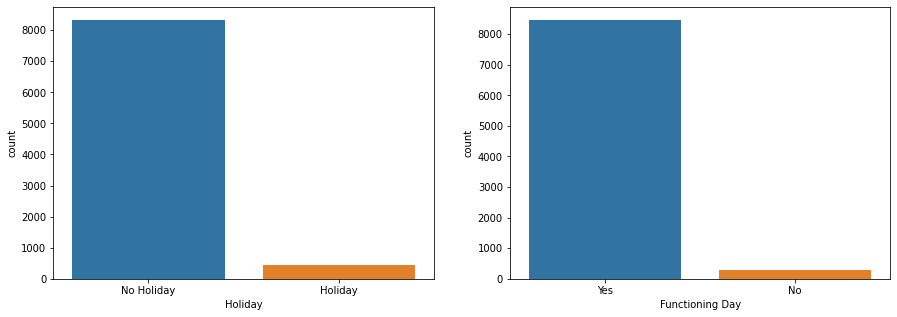

In [ ]:
#count plot for holiday and functioning day 'Holiday', 'Functioning Day'
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Holiday', data=df, ax=axs[0])
sns.countplot(x='Functioning Day', data=df, ax=axs[1])

<Figure size 1080x720 with 0 Axes>

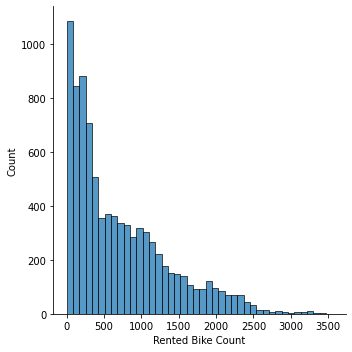

In [47]:
# To perform EDA on dependent variable.
plt.figure(figsize=(15,10))
sns.displot(df['Rented Bike Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


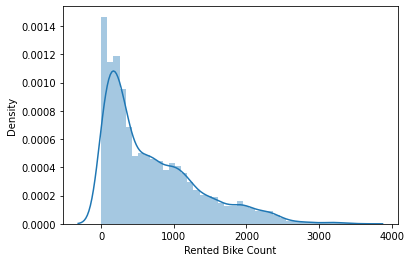

In [48]:
sns.distplot(df['Rented Bike Count']) 

In [49]:
x = df['Rented Bike Count']
x.skew()

1.1534281773679014

Since, the distribution plot is positively skewed we can use Log-Transformation.

In [50]:
x = np.log(df['Rented Bike Count'])
x.skew()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

In [51]:
a = (np.sqrt(df['Rented Bike Count']))
a.skew()

0.237362090985412

In [ ]:
#plt.figure(figsize=(7,7))
#sns.displot(np.log10(df['Rented Bike Count']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


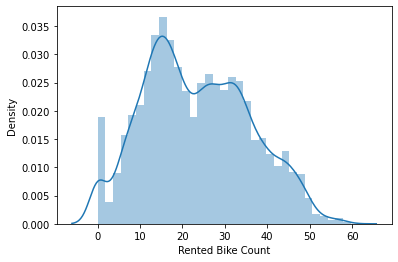

In [52]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

# Model Preparation